In [2]:
from pyo import *
import time

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

/Users/joceline/anaconda3/envs/sound/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/joceline/anaconda3/envs/sound/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/joceline/anaconda3/envs/sound/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/joceline/anaconda3/envs/sound/lib

In [16]:
import matplotlib.pyplot as plt
import random

https://keras.io/examples/vision/mnist_convnet/

In [26]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

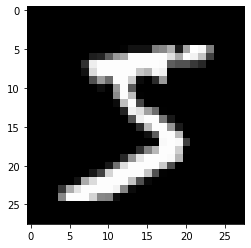

5


In [27]:
fig = plt.figure
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(y_train[0])

In [28]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [29]:
#make training set smaller for faster training
random.seed(42)
rand_idx = random.sample(range(0,x_train.shape[0]), 5000)
x_train = x_train[rand_idx]
y_train = y_train[rand_idx]
                         
print(x_train.shape)
print(y_train.shape)

(5000, 28, 28, 1)
(5000, 10)


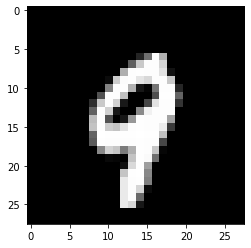

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [30]:
fig = plt.figure
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()
print(y_train[0])

In [82]:
model = keras.Sequential(    
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model.summary()

batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [83]:
start = time.time()

#initiate server
s = Server().boot()
s.amp = 0.2
s.start()
osc = Sine(freq=0).out()

#save in audio file
# path = '/Users/joceline/Documents/UNI/Semester3/Sonification/'
# s.recstart(path + 'simple_batch_loss.wav')

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, 
          verbose=0, callbacks=[hear_loss_callback(osc)])

# s.recstop()
s.stop()

end = time.time()
print('Time: ', end-start)

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.
Time:  25.71657919883728


In [81]:
class hear_loss_callback(keras.callbacks.Callback):
    
    def __init__(self, osc):
        self.osc = osc
        
    def on_train_batch_end(self, batch, logs=None):

        cur_loss = logs["loss"]
        #normalizing loss to be between 300 and 5000
        #assuming a loss value between 0 and 3
        norm_loss = float(200 + (cur_loss - 0)/(3 - 0) * (5000-300))

        osc.setFreq(norm_loss)